In [ ]:
Стационарность рядов

In [15]:
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import warnings
from itertools import product

In [2]:
!pip install statsmodels


In [13]:
PJME = pd.read_csv('my_PJME_MW.csv',index_col=['Date'], parse_dates=['Date'], dayfirst=True).iloc[:, 1:2]
# Возьмём ресемплинг по дням, неделям и месяцам
PJME_day = pd.read_csv('my_PJME_MW.csv',index_col=['Date'], parse_dates=['Date'], dayfirst=True).iloc[:, 1:2].resample('D', how='mean')
PJME_week = pd.read_csv('my_PJME_MW.csv',index_col=['Date'], parse_dates=['Date'], dayfirst=True).iloc[:, 1:2].resample('W', how='mean')
PJME_month = pd.read_csv('my_PJME_MW.csv',index_col=['Date'], parse_dates=['Date'], dayfirst=True).iloc[:, 1:2].resample('M', how='mean')

c:\users\user\pycharmprojects\untitled1\venv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\user\pycharmprojects\untitled1\venv\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  after removing the cwd from sys.path.
c:\users\user\pycharmprojects\untitled1\venv\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  """


<Figure size 1080x504 with 0 Axes>

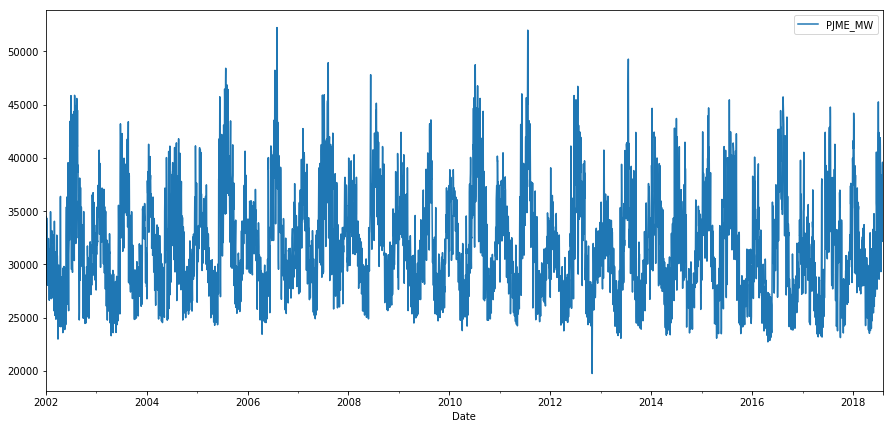

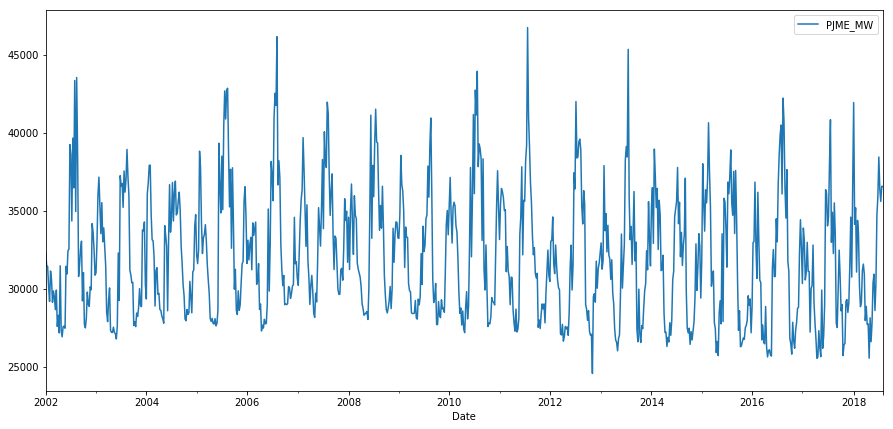

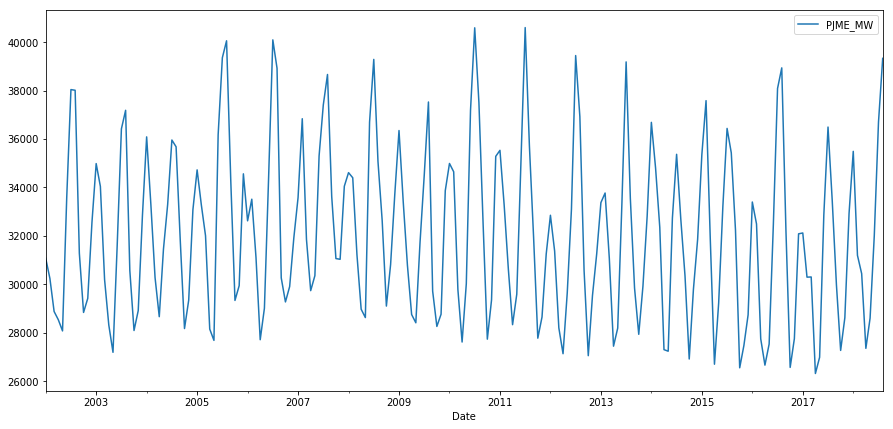

In [14]:
plt.figure(figsize(15,7))

PJME_day.plot()
PJME_week.plot()
PJME_month.plot()

In [ ]:
При сравнение этих графиков, видно, что по дням слишком перегружен как для зрительного анализа, так и для статистического.
В графиках явно отсутствуют тренды, наблюдается гомоскедастичность (разброс дисперсии не сильный), сезонность также отсутствует.
Исходя из чего можно предположить, что ряд является стационарным. Убедимся в этом с помощью теста Дики-Фуллера. Для дня он не
является информативным, так как количество элементов слишком большое, наиболее близок к истине является тест по неделям.

In [15]:
# Посчитаем критейри Дики-Фуллера для разных ресемплов (Дни, недели и месяца)
print(" Критерий Дики-Фуллера для дня: p=%f" % sm.tsa.stattools.adfuller(PJME_day.PJME_MW)[1])
print(" Критерий Дики-Фуллера для недели: p=%f" % sm.tsa.stattools.adfuller(PJME_week.PJME_MW)[1])
print(" Критерий Дики-Фуллера для месяца: p=%f" % sm.tsa.stattools.adfuller(PJME_month.PJME_MW)[1])

 Критерий Дики-Фуллера для дня: p=0.000000
 Критерий Дики-Фуллера для недели: p=0.000000
 Критерий Дики-Фуллера для месяца: p=0.307570


In [16]:
"Для дней: {}, Для недель: {}, Для месяцев: {}".format(len(PJME_day), len(PJME_week), len(PJME_month))

'Для дней: 6059, Для недель: 866, Для месяцев: 200'

In [ ]:
Можно заметить, для дней и недель p-value близок к 0, то есть гипотеза H0 о единичных корнях отклоняется, но принимается
для месяцев. Как можно предположить для месяцев не так много данных (Всего 200 элементов), поэтому получился такой результат.

In [ ]:
Таким образом, мы подтвердили свою гипотезу о том, что ряд является стационарным.

Populating the interactive namespace from numpy and matplotlib


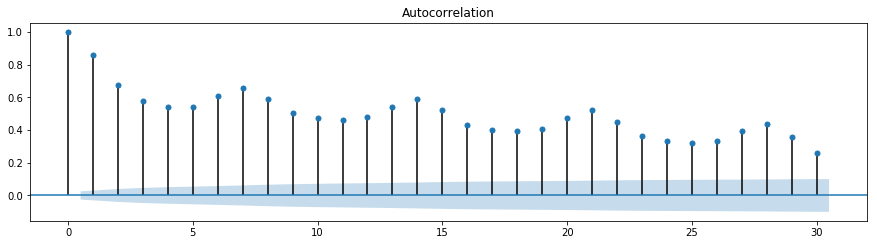

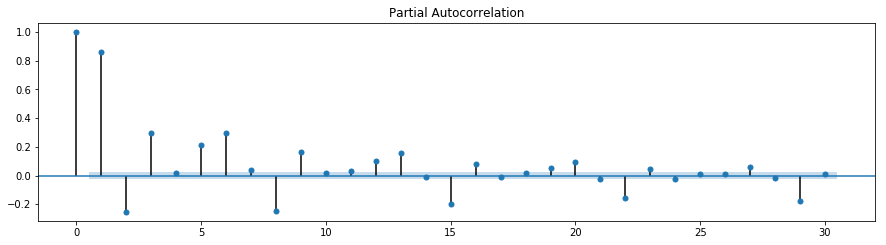

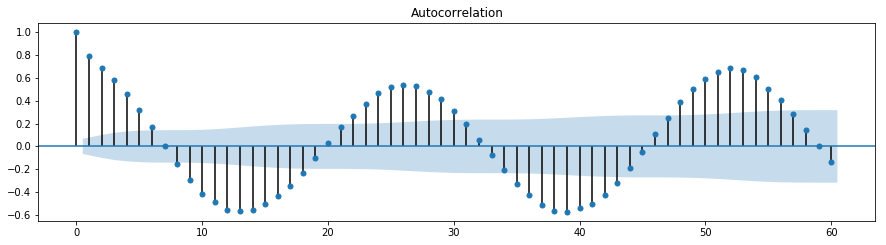

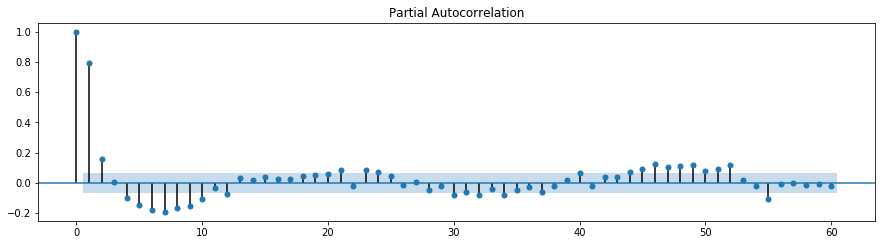

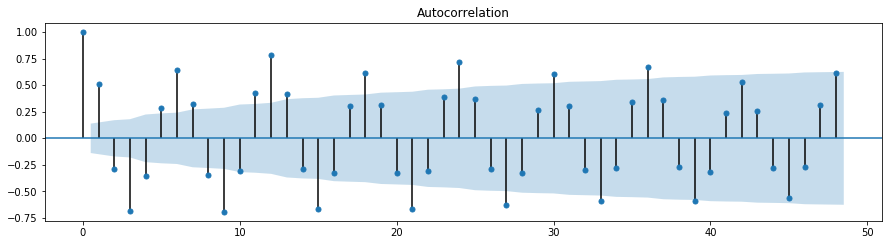

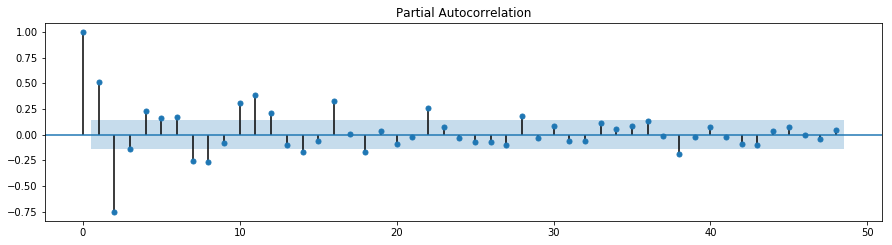

In [25]:
%pylab inline

plt.figure(figsize(15,8))
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(PJME_day.PJME_MW.values.squeeze(), lags=30, ax=ax)
pylab.show()
ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(PJME_day.PJME_MW.values.squeeze(), lags=30, ax=ax)
pylab.show()

plt.figure(figsize(15,8))
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(PJME_week.PJME_MW.values.squeeze(), lags=2 * 30, ax=ax)
pylab.show()
ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(PJME_week.PJME_MW.values.squeeze(), lags=2 * 30, ax=ax)
pylab.show()

plt.figure(figsize(15,8))
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(PJME_month.PJME_MW.values.squeeze(), lags=4 * 12, ax=ax)
pylab.show()
ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(PJME_month.PJME_MW.values.squeeze(), lags=48, ax=ax)
pylab.show()

Оптимальный параметр преобразования Кокса- Бокса: -0.929646
 Критерий Дики-Фуллера: p=0.000000


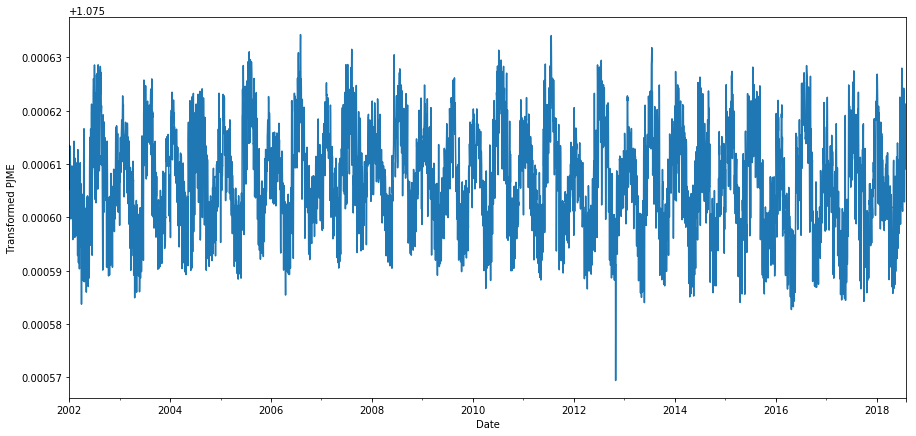

In [18]:
PJME_day['PJME_MW_BOX'], lmbda = stats.boxcox(PJME_day.PJME_MW)
plt.figure(figsize(15,7))
PJME_day.PJME_MW_BOX.plot()
plt.ylabel(u'Transformed PJME')
print("Оптимальный параметр преобразования Кокса- Бокса: %f" % lmbda)
print(" Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(PJME_day.PJME_MW_BOX)[1])

Оптимальный параметр преобразования Кокса- Бокса: -1.504300
 Критерий Дики-Фуллера: p=0.000001


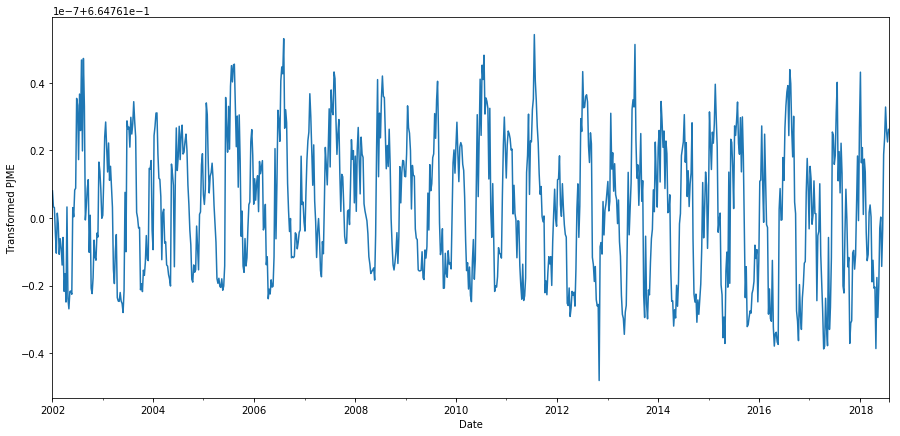

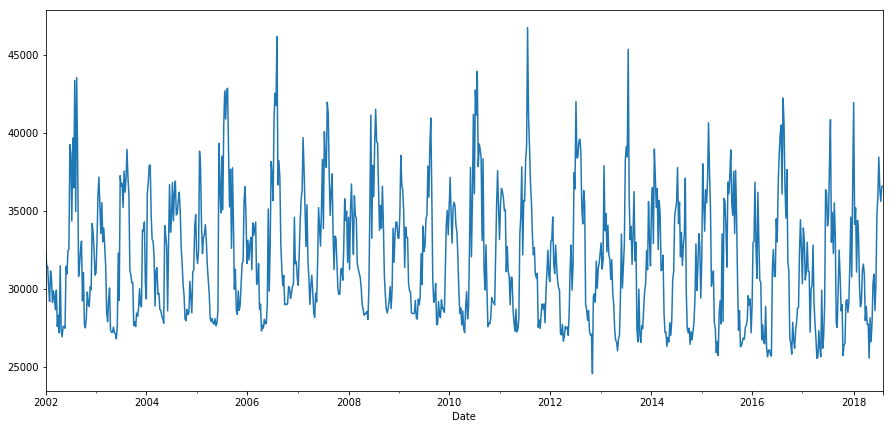

In [22]:
PJME_week['PJME_MW_BOX'], lmbda = stats.boxcox(PJME_week.PJME_MW)
plt.figure(figsize(15,7))
PJME_week.PJME_MW_BOX.plot()
plt.ylabel(u'Transformed PJME')
print("Оптимальный параметр преобразования Кокса- Бокса: %f" % lmbda)
print(" Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(PJME_week.PJME_MW_BOX)[1])
plt.figure(figsize(15,7))
PJME_week.PJME_MW.plot()

Оптимальный параметр преобразования Кокса- Бокса: -1.180792
 Критерий Дики-Фуллера: p=0.345407


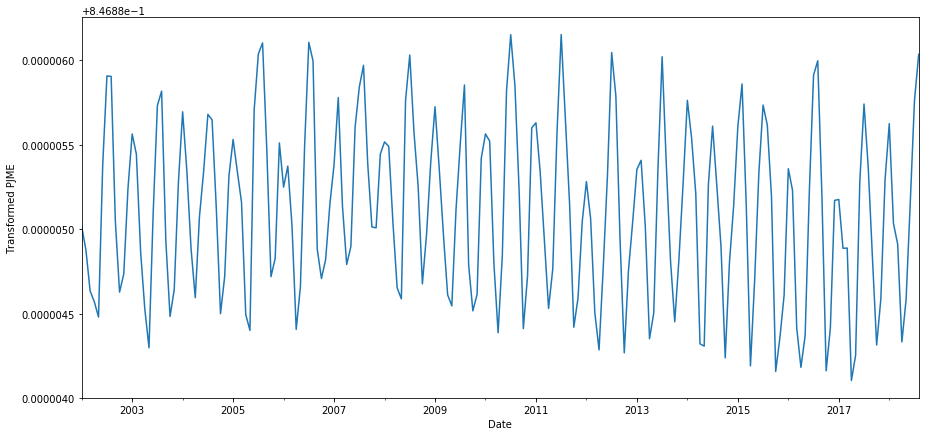

In [23]:
PJME_month['PJME_MW_BOX'], lmbda = stats.boxcox(PJME_month.PJME_MW)
plt.figure(figsize(15,7))
PJME_month.PJME_MW_BOX.plot()
plt.ylabel(u'Transformed PJME')
print("Оптимальный параметр преобразования Кокса- Бокса: %f" % lmbda)
print(" Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(PJME_month.PJME_MW_BOX)[1])

Критерий Дики-Фуллера: p=0.000000


<Figure size 1080x720 with 0 Axes>

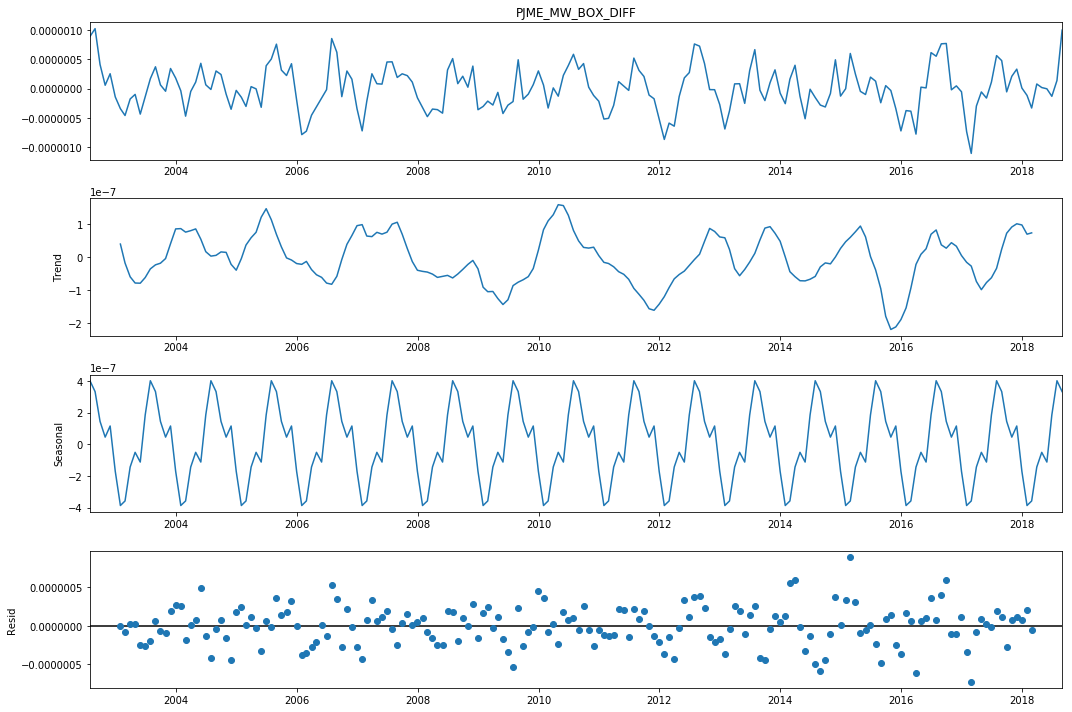

In [33]:
PJME_month['PJME_MW_BOX_DIFF'] = PJME_month.PJME_MW_BOX - PJME_month.PJME_MW_BOX.shift(6)
plt.figure(figsize(15,10))
sm.tsa.seasonal_decompose(PJME_month.PJME_MW_BOX_DIFF[6:]).plot()
print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(PJME_month.PJME_MW_BOX_DIFF[6:])[1])

Критерий Дики-Фуллера: p=0.000000


<Figure size 1080x720 with 0 Axes>

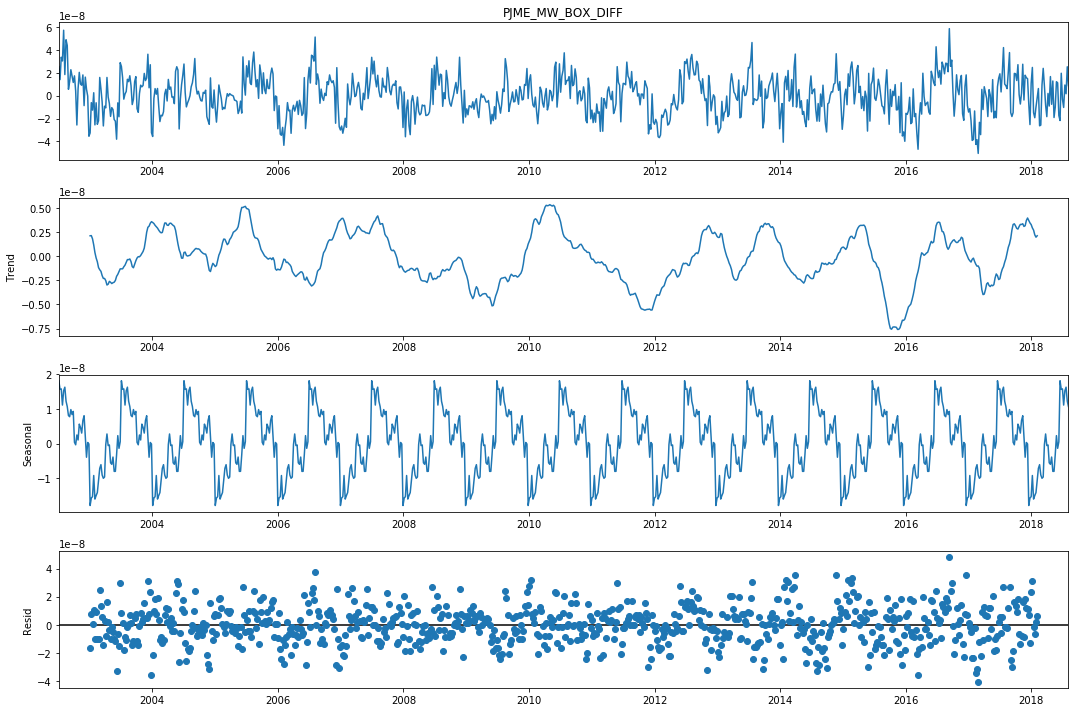

In [34]:
PJME_week['PJME_MW_BOX_DIFF'] = PJME_week.PJME_MW_BOX - PJME_week.PJME_MW_BOX.shift(26)
plt.figure(figsize(15,10))
sm.tsa.seasonal_decompose(PJME_week.PJME_MW_BOX_DIFF[26:]).plot()
print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(PJME_week.PJME_MW_BOX_DIFF[26:])[1])

Критерий Дики-Фуллера: p=0.000000


<Figure size 1080x720 with 0 Axes>

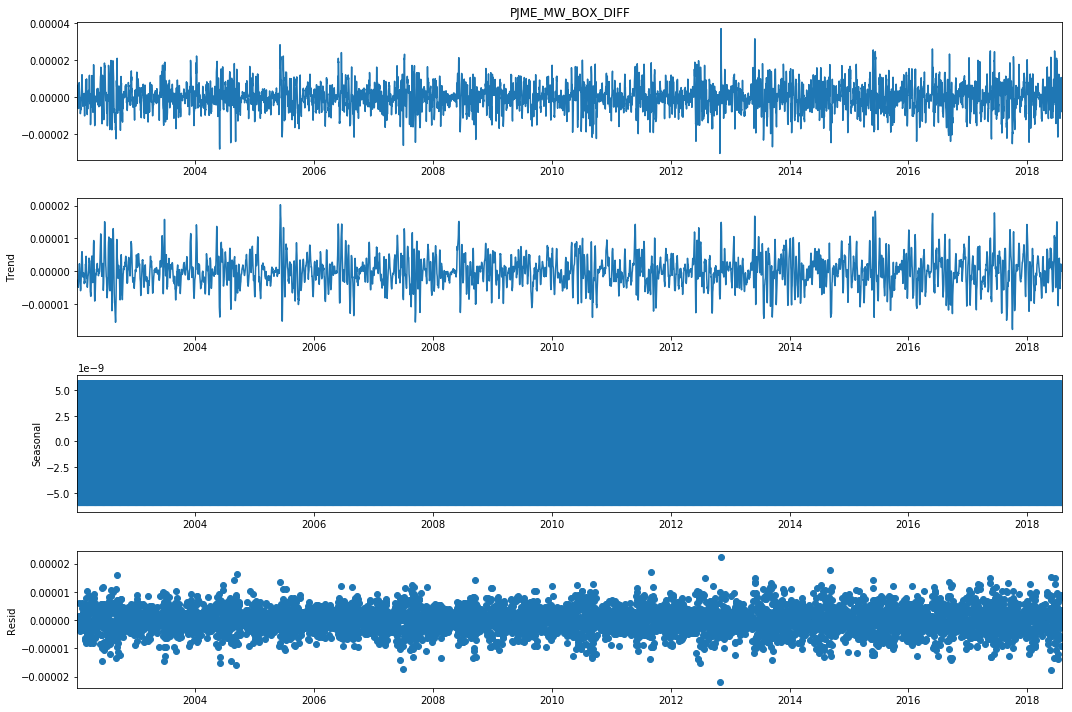

In [27]:
PJME_day['PJME_MW_BOX_DIFF'] = PJME_day.PJME_MW_BOX - PJME_day.PJME_MW_BOX.shift(7)
plt.figure(figsize(15,10))
sm.tsa.seasonal_decompose(PJME_day.PJME_MW_BOX_DIFF[7:]).plot()
print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(PJME_day.PJME_MW_BOX_DIFF[7:])[1])

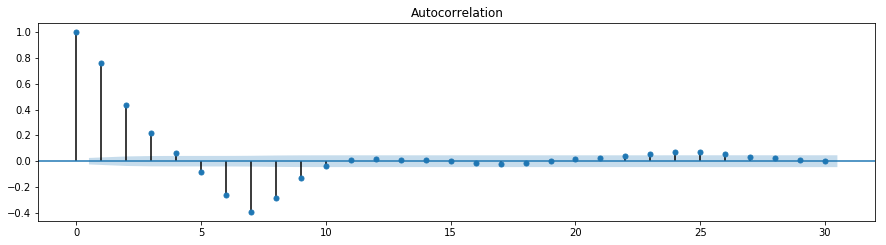

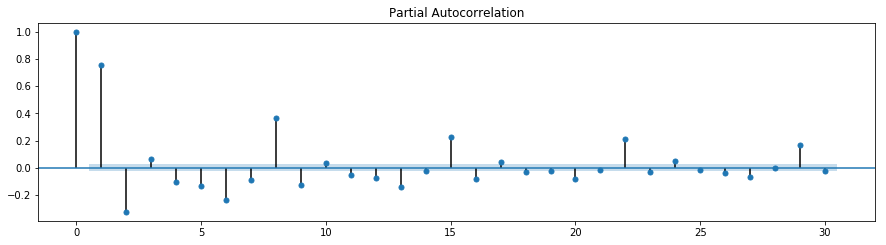

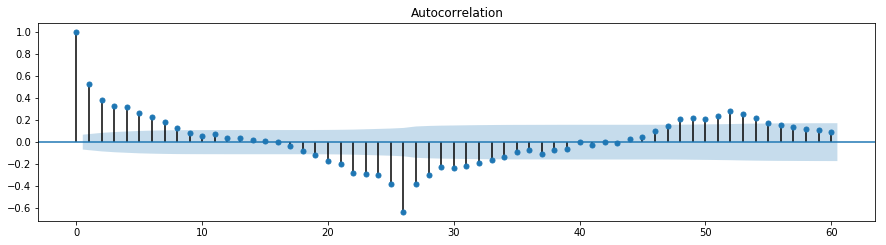

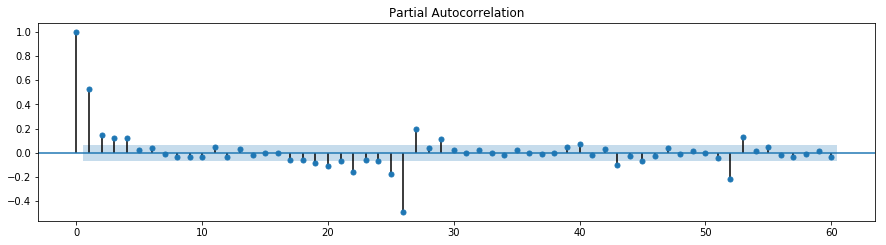

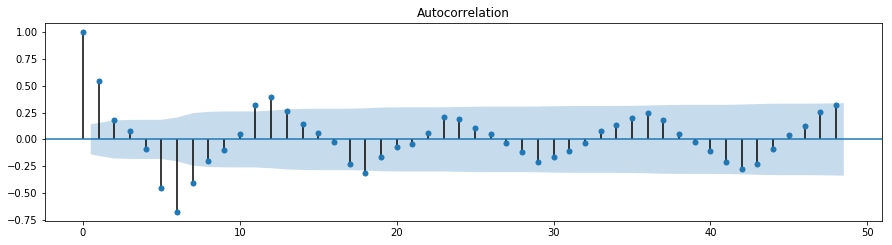

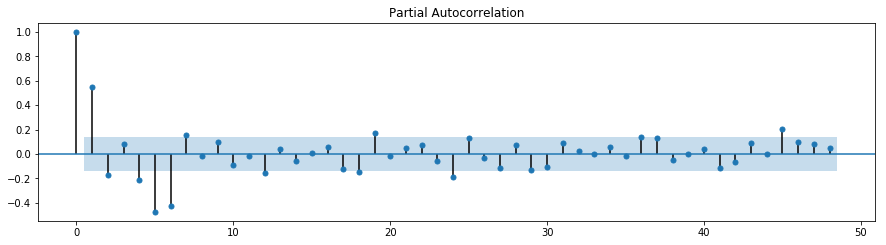

In [38]:
plt.figure(figsize(15,8))
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(PJME_day.PJME_MW_BOX_DIFF.values[7:].squeeze(), lags=30, ax=ax)
pylab.show()
ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(PJME_day.PJME_MW_BOX_DIFF.values[7:].squeeze(), lags=30, ax=ax)
pylab.show()

plt.figure(figsize(15,8))
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(PJME_week.PJME_MW_BOX_DIFF[26:].values.squeeze(), lags=2 * 30, ax=ax)
pylab.show()
ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(PJME_week.PJME_MW_BOX_DIFF[26:].values.squeeze(), lags=2 * 30, ax=ax)
pylab.show()

plt.figure(figsize(15,8))
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(PJME_month.PJME_MW_BOX_DIFF[6:].values.squeeze(), lags=4 * 12, ax=ax)
pylab.show()
ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(PJME_month.PJME_MW_BOX_DIFF[6:].values.squeeze(), lags=4 * 12, ax=ax)
pylab.show()

In [ ]:
month
p = 3
d = 0
q = 11
P = 4
D = 1
Q = 2


In [21]:
from pandas import read_csv, DataFrame, Series
import statsmodels.api as sm
import rpy2.robjects as R
from rpy2.robjects.packages import importr
from rpy2.robjects import pandas2ri
pandas2ri.activate()
from pandas import date_range

stats_r = importr('stats')
tseries_r = importr('tseries')

order = R.IntVector((3,0,11))
season = R.ListVector({'order': R.IntVector((4,1,2)), 'period' : 6})
model = stats_r.arima(y, order = order, seasonal=season)

RRuntimeError: 

NameError: name 'Sys' is not defined

In [6]:
import os
import win32api
R_USER  =  os.getenv ( "R_USER" )
R_USER
R_USER  =  win32api.GetUserName()
R_USER

'Just a user'

In [9]:
!pip install C:\Users\user\AppData\Local\Programs\Python\Python37-32\Lib\site-packages\rpy2-2.9.5-cp37-cp37m-win32.whl

In [ ]:
os.environ.update({'R_USER': 'Just a user'})

In [13]:
!pip install tzlocal